In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [3]:
#importing boston dataset
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
#printing description of the boston dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

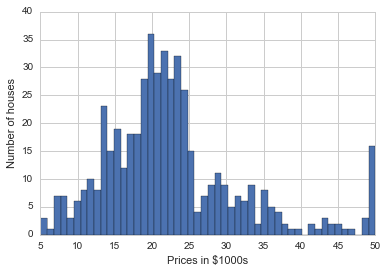

In [6]:
plt.hist(boston.target,bins=50)
plt.xlabel("Prices in $1000s")
plt.ylabel("Number of houses")

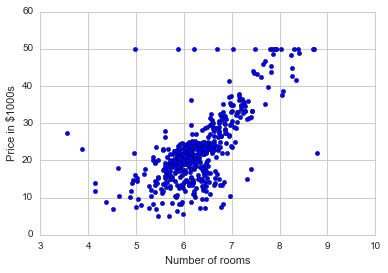

In [7]:
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel("Price in $1000s")
plt.xlabel("Number of rooms")

In [8]:
boston_df=DataFrame(boston.data)

boston_df.columns=boston.feature_names

boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#create a new columns names Price 
boston_df["Price"]=boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


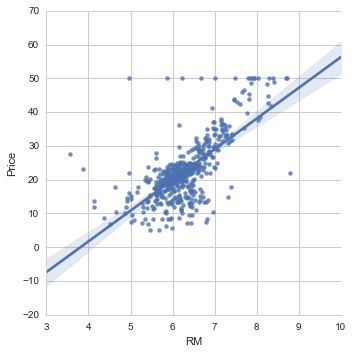

In [11]:
sns.lmplot("RM","Price",boston_df)


### Using numpy for a Univariate Linear Regression
when using numpy's built in least suare linear model, weneed to set up X and Y arrary. for X array, numpy expects a 2 dimensional array.The first dimension is the different example value and the second dimension is the attribute number. In this example we have our value as mean number of rooms per houses, adn this is a single attribute and so the value of the second dimensional array is just 1. So, for this we need to create (506,1) shape array. An easy way to achieve this is to use numpy's built-in vertical stack tool, vstack

In [12]:
#Set X as median room values
X=boston_df.RM
X.shape

(506,)

In [13]:
#use the vstack to make X two-dimensional
X=np.vstack(boston_df.RM)

X.shape

(506, 1)

In [14]:
#Set Y as target price of the house
Y=boston_df.Price
Y.shape

(506,)

### Now lets try to create a single variate linear regression using numpy 
- We know that a line has equation of y=mx+b
- In term of matrices we have  Y=Ap. where A=[x 1] and p=\begin{matrix} m\\b \end{matrix}

In [15]:
#Now create array such as [X 1]
X=np.array([[value, 1] for value in X])
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [16]:
#Now we habe all the things we need to get the best fit line euqtion coefficient
#we need to use linear algebra method (linlalg) from numpy and then use least square method (lstsq)
#note we only need the first vlaue form the result it spits out

#getting the value of m and b using least squre method
m,b=np.linalg.lstsq(X, Y)[0]



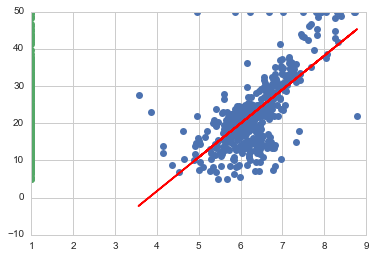

In [17]:
#Lets make scatter plot and the best fit line using numbers we got form the numpy's least squared method from the lienar
#lgebra library
plt.plot(X,Y,'o')
x=boston_df.RM
#now plot the best ft line
plt.plot(x,m*x+b,"r",label="Best Fit Line")


## Lets star finding ther error
For linear regression we have total error, means squared error and root mean squared error. Numpy's least squred method in the linear algebra gives us totla error which is the sum of squared error or distance of each ponts form the line of best fit. We will have a look at the root mean squred erorr in this section as it closeky resembles standard deviation.

In [18]:
#Get the resuling array
result=np.linalg.lstsq(X,Y)

#Get the total error
error_total=result[1]

#Get the root mean squred error
rmse=np.sqrt(error_total/len(X))

print("The root mean squred error was %.2f"%rmse)

The root mean squred error was 6.60


## From Here on we will start using sci kit learn to do mulivariate linear regression

In [19]:
#import for linear regression 
import sklearn
from sklearn.linear_model import LinearRegression

In [20]:
#Nowe we create a Linear Regression object.
lreg=LinearRegression()

### The function that wil be used for linear regression are:
- lreg.fit() which fits linear model
- lreg.predict() which is used to predict Y using linear model with estimatred coefficients
- lreg.score() which returns the coefficient of determinant (R^2). A measure of how well observed outcomes are replicated by the model.

In [21]:
#creat X_multi i.e. multi-variate dataframe which does not contain the Price as it the target that we want to predict
#note drop("Price",1) is used to drop price and 1 means we are dropping a columns instead of rows
X_multi=boston_df.drop("Price",1)

#create Y_target. it is the thing we want to predict
Y_target=boston_df.Price


In [22]:
#now use the fit model to fit the linear model and estimate the cofficients
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
#printing the estimated  of the linear euqtion 
print("The estimated intercept coefficient is %2f"%lreg.intercept_)

#printing the number of coefficient used
print("The number of coeffcient used is %2f"%len(lreg.coef_))


The estimated intercept coefficient is 36.491103
The number of coeffcient used is 13.000000


Now, I will set up a DataFrame showing all the coefficients and their estimaed coefficients obtained form the linear regression

In [24]:
#Set a DatqaFrame from the Features
coeff_df=DataFrame(boston_df.columns)
coeff_df.columns=["Features"]


#Set a new column lining up the coefficient  from the linear regresion
coeff_df["Coefficient Estimate"]=pd.Series(lreg.coef_)

#print the dataframe
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


### Using training and validataion

When we use machine learning model such as linear regression, the dataset is usually split in order to train the model and then test the model. Scikil learn has funciton called ** train_test_split** in order to split the data in order to train and then validate it leter.

The parameter passed to the train_test_split() are X,Y and optinally test_size parameter which represents the proportion of the dataset to include the test split. As well as train_size parameter .


In [25]:
#Grab the target and teh feature dataframes and then split them into train and test sets
X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X,boston_df.Price)

#### Lets see the result of the split

In [29]:
#printing the shape of the splitted datas
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [32]:
#we wil now training set to create a linear model for predicitona and use testing set for validation

#creating linear regression object
lreg=sklearn.linear_model.LinearRegression()

#fit the traiing set datas
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#Now lets predict the data for value os X in training set and the tesitn set
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [38]:
#Lets take the mean squared error now
print("Fit a model X_train and calculate the MSE with Y_train: %.2f"%np.mean((Y_train-pred_train)**2))

print("Fit the model X_train and claculate the MSE with X_test and Y_test: %.2f"%np.mean((Y_test-pred_test)**2))

Fit a model X_train and calculate the MSE with Y_train: 44.52
Fit the model X_train and claculate the MSE with X_test and Y_test: 40.90


In [39]:
#Now lets calculate the RMSE or root mean squred errors 

print("Fit a model X_train and calculate the RMSE with Y_train: %.2f"%np.sqrt(np.mean((Y_train-pred_train)**2)))

print("Fit the model X_train and claculate the RMSE with X_test and Y_test: %.2f"%np.sqrt(np.mean((Y_test-pred_test)**2)))

Fit a model X_train and calculate the RMSE with Y_train: 6.67
Fit the model X_train and claculate the RMSE with X_test and Y_test: 6.40


Now the question is how significant is the MSE or RMSE differences is for prediction made for the trianing and the testing splits. SO, for that we will make a plot knows as the residual plot to visualize how good our analysis was.

### Residuals Plot
- Residuals=Observed value - Predicted value
A residual plot shows the residuals in the vertical axis and the independient variable in the horizontal axis. If the points in the residual plot are randomly scattered near the horizontal axis, a linear model is appropriate for the data; otherwise non linear model might be more appropriate.

Residual plots are a good way to visualize the data in your error. If you have done a good job, than you data should be randomly scattered around the line zero. If there is some structure or pattern than that means your modle is not capturing some things. There could be interaction between two variables that you did not considered or maybe you are measuing time dependent data. If that's the case you need to go back to your model and check your data set closely.

Lets now create residual plot for the boston house price data.

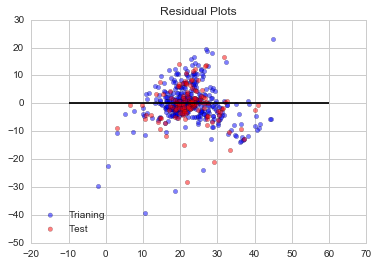

In [46]:
#Scatter plot the training data
train=plt.scatter(pred_train,(pred_train-Y_train),c="b",alpha=0.5)

#Scatter plot the testing data
test=plt.scatter(pred_test,(pred_test-Y_test),c="r",alpha=0.5)

#plot a horizontal axis at zero
plt.hlines(y=0,xmin=-10,xmax=60)

#labels
plt.legend((train,test),("Trianing","Test"),loc="lower left")
plt.title("Residual Plots")

As we can see that the residual plot or residulas vs the predicted value does not have any patterns. This is good because a model can be divided into tow componentes as follows
- Response = (Constant + Predictors) + Error 

or

- Response = Deterministic + Stochastic

In other words our predictor should fall under the deterministic cateegory while the error should fall under stochastic. This ensure that our modle is good at predciting anything that is deterministic or not random and all the errors should be due to randmomness.